# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}
current_weather_list = []
city =[]
date = time.process_time
print('Begining Data Retrival')
for x in range(len(cities)):
    try:
        current_weather = owm.get_current(cities[x], **settings)
        print(f"Processing Record {x} city: {cities[x]}")
        current_weather_list.append(current_weather)
        city.append(cities[x])
        
    except:
        print("City not found. Skipping...")     
    time.sleep(.02) 
print('Data Retrival Complete') 

Begining Data Retrival
Processing Record 0 city: ponta do sol
Processing Record 1 city: bronnoysund
Processing Record 2 city: lavrentiya
City not found. Skipping...
Processing Record 4 city: ushuaia
Processing Record 5 city: tura
Processing Record 6 city: kapaa
Processing Record 7 city: zhigansk
Processing Record 8 city: huilong
Processing Record 9 city: busselton
Processing Record 10 city: bredasdorp
Processing Record 11 city: sorland
Processing Record 12 city: polyarnyy
Processing Record 13 city: ilabaya
Processing Record 14 city: rikitea
Processing Record 15 city: kununurra
Processing Record 16 city: provideniya
Processing Record 17 city: hay river
Processing Record 18 city: pointe michel
Processing Record 19 city: hailey
Processing Record 20 city: abadiania
Processing Record 21 city: barrow
Processing Record 22 city: lasa
Processing Record 23 city: port elizabeth
Processing Record 24 city: avarua
Processing Record 25 city: puerto escondido
City not found. Skipping...
Processing Rec

Processing Record 227 city: chany
City not found. Skipping...
Processing Record 229 city: ketchikan
Processing Record 230 city: moron
Processing Record 231 city: yellowknife
Processing Record 232 city: castro
Processing Record 233 city: tongliao
Processing Record 234 city: mbarara
Processing Record 235 city: vardo
Processing Record 236 city: dingle
Processing Record 237 city: nishihara
Processing Record 238 city: touros
City not found. Skipping...
Processing Record 240 city: saint-georges
Processing Record 241 city: mareeba
Processing Record 242 city: bambous virieux
Processing Record 243 city: itarema
Processing Record 244 city: novoagansk
Processing Record 245 city: bonavista
Processing Record 246 city: aklavik
Processing Record 247 city: gonen
City not found. Skipping...
Processing Record 249 city: dhilwan
Processing Record 250 city: waingapu
Processing Record 251 city: tiksi
Processing Record 252 city: acari
Processing Record 253 city: san rafael
Processing Record 254 city: neuquen

Processing Record 454 city: stawell
Processing Record 455 city: balezino
Processing Record 456 city: houston
Processing Record 457 city: northam
Processing Record 458 city: mugan
Processing Record 459 city: tabory
Processing Record 460 city: indramayu
Processing Record 461 city: rawlins
Processing Record 462 city: chandler
Processing Record 463 city: belyy yar
Processing Record 464 city: bakel
Processing Record 465 city: ozinki
Processing Record 466 city: moerai
Processing Record 467 city: thomasville
Processing Record 468 city: mitsamiouli
Processing Record 469 city: salinopolis
Processing Record 470 city: great yarmouth
Processing Record 471 city: larsnes
Processing Record 472 city: araouane
Processing Record 473 city: epe
Processing Record 474 city: vysha
Processing Record 475 city: nantucket
Processing Record 476 city: floresti
City not found. Skipping...
Processing Record 478 city: makakilo city
Processing Record 479 city: caucaia
Processing Record 480 city: sturgeon bay
Processin

In [4]:
summary = ["name","coord.lat","coord.lon","main.temp", "wind.speed","main.humidity", "clouds.all","sys.country","dt","main.temp_max"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in current_weather_list]

weather_data = pd.DataFrame(data, index=city)
column_names = ["City","Latitude","Longitude","Temperature","Wind Speed (mph)" , "Humidity (%)","Cloudiness (%)","Country","Date","Max Temperature (F)"]
weather_data = pd.DataFrame(data, columns=column_names)

In [5]:
weather_data.to_csv("Cities_Weather.csv")
weather_data.count()

City                   549
Latitude               549
Longitude              549
Temperature            549
Wind Speed (mph)       549
Humidity (%)           549
Cloudiness (%)         549
Country                549
Date                   549
Max Temperature (F)    549
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.head()

,City,Latitude,Longitude,Temperature,Wind Speed (mph),Humidity (%),Cloudiness (%),Country,Date,Max Temperature (F)
0,Ponta do Sol,-20.63,-46.00,67.23,3.38,88,32,BR,1547349197,67.23
1,Bronnoysund,65.46,12.20,32.00,9.17,100,88,NO,1547347800,32.00
2,Lavrentiya,65.58,-170.99,-11.08,28.70,92,8,RU,1547348720,-11.08
3,Ushuaia,-54.81,-68.31,42.80,32.21,75,75,AR,1547344800,42.80
4,Tura,25.52,90.21,61.02,3.49,77,0,IN,1547349198,61.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'City Latitude vs. Max Temperature (1/12/2019)')

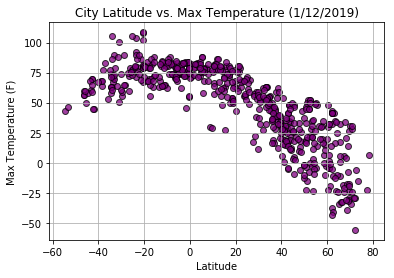

In [7]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,9]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
plt.title(f"City Latitude vs. {t_y.name[:-3]}(1/12/2019)")

#### Latitude vs. Humidity Plot

Text(0.5,1,'City Latitude vs. Humidity (1/12/2019)')

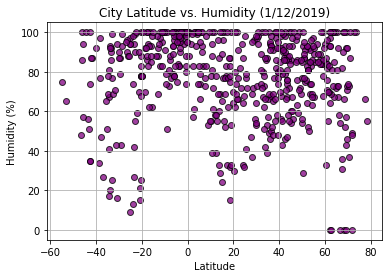

In [8]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,5]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
plt.title(f"City {l_x.name} vs. {t_y.name[:-3]}(1/12/2019)")

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'City Latitude vs. Cloudiness (1/12/2019)')

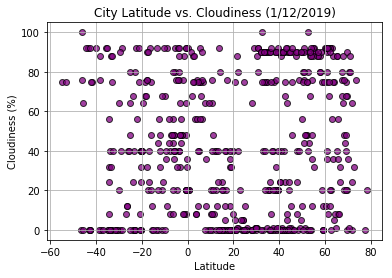

In [9]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,6]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
plt.title(f"City {l_x.name} vs. {t_y.name[:-3]}(1/12/2019)")

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'City Latitude vs. Wind Speed (1/12/2019)')

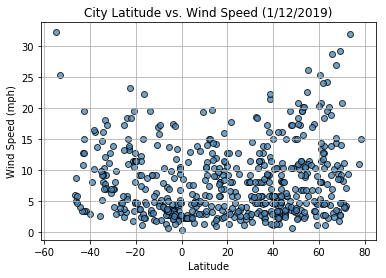

In [20]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,4]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
plt.title(f"City {l_x.name} vs. {t_y.name[:-5]}(1/12/2019)")